In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors
import seaborn as sns

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
ds = pd.read_csv(r'C:\Users\harsh\Python Practice\titanic\train.csv')
ds_test = pd.read_csv(r'C:\Users\harsh\Python Practice\titanic\test.csv')

In [97]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
ds.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<Axes: >

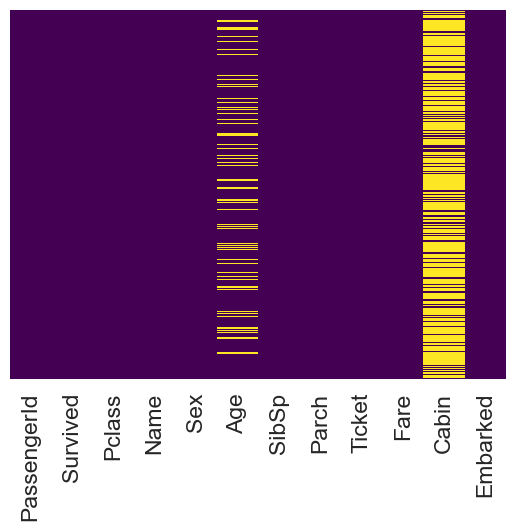

In [101]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [102]:
dropcol=['Cabin','Name','PassengerId','Ticket']
ds.drop(dropcol,axis=1,inplace=True)

In [103]:
ds_cleaned=ds.dropna()

In [104]:
ds_cleaned.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712,712.000000,712.000000,712.000000,712.000000,712
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN


In [105]:
print(ds_cleaned.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


C:\Users\harsh\AppData\Local\Temp\ipykernel_8660\915902546.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ds_cleaned.corr()


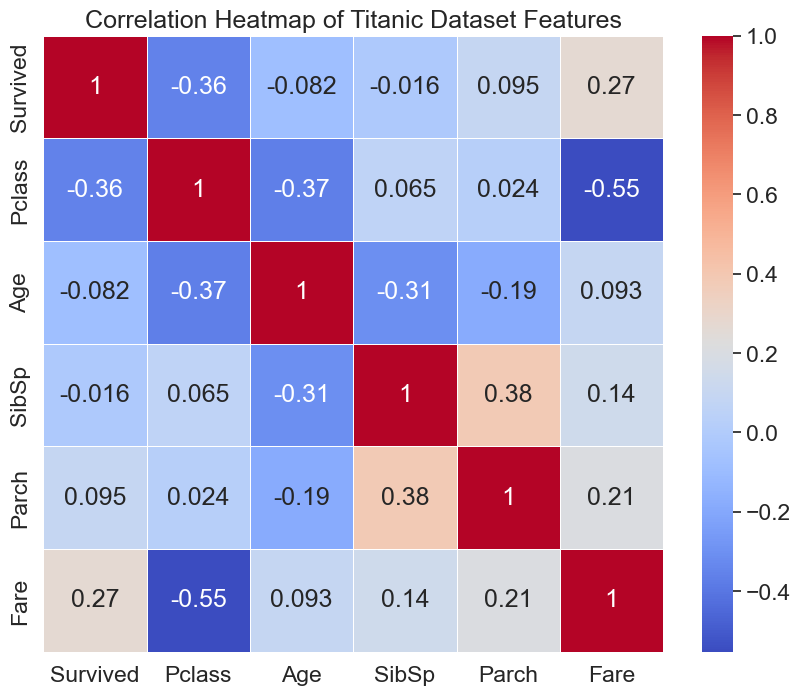

In [106]:
correlation_matrix = ds_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()

In [107]:
label_encoder = LabelEncoder()

# Apply label encoding
ds_cleaned['Embarked'] = label_encoder.fit_transform(ds_cleaned['Embarked'])

ds_cleaned['Fare'] = np.log(ds_cleaned['Fare'] + 1)

C:\Users\harsh\AppData\Local\Temp\ipykernel_8660\1017436916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cleaned['Embarked'] = label_encoder.fit_transform(ds_cleaned['Embarked'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_8660\1017436916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cleaned['Fare'] = np.log(ds_cleaned['Fare'] + 1)


In [108]:
ds_cleaned['Sex'] = label_encoder.fit_transform(ds_cleaned['Sex'])

C:\Users\harsh\AppData\Local\Temp\ipykernel_8660\3130502581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cleaned['Sex'] = label_encoder.fit_transform(ds_cleaned['Sex'])


In [109]:
ds_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.110213,2
1,1,1,0,38.0,1,0,4.280593,0
2,1,3,0,26.0,0,0,2.188856,2
3,1,1,0,35.0,1,0,3.990834,2
4,0,3,1,35.0,0,0,2.202765,2


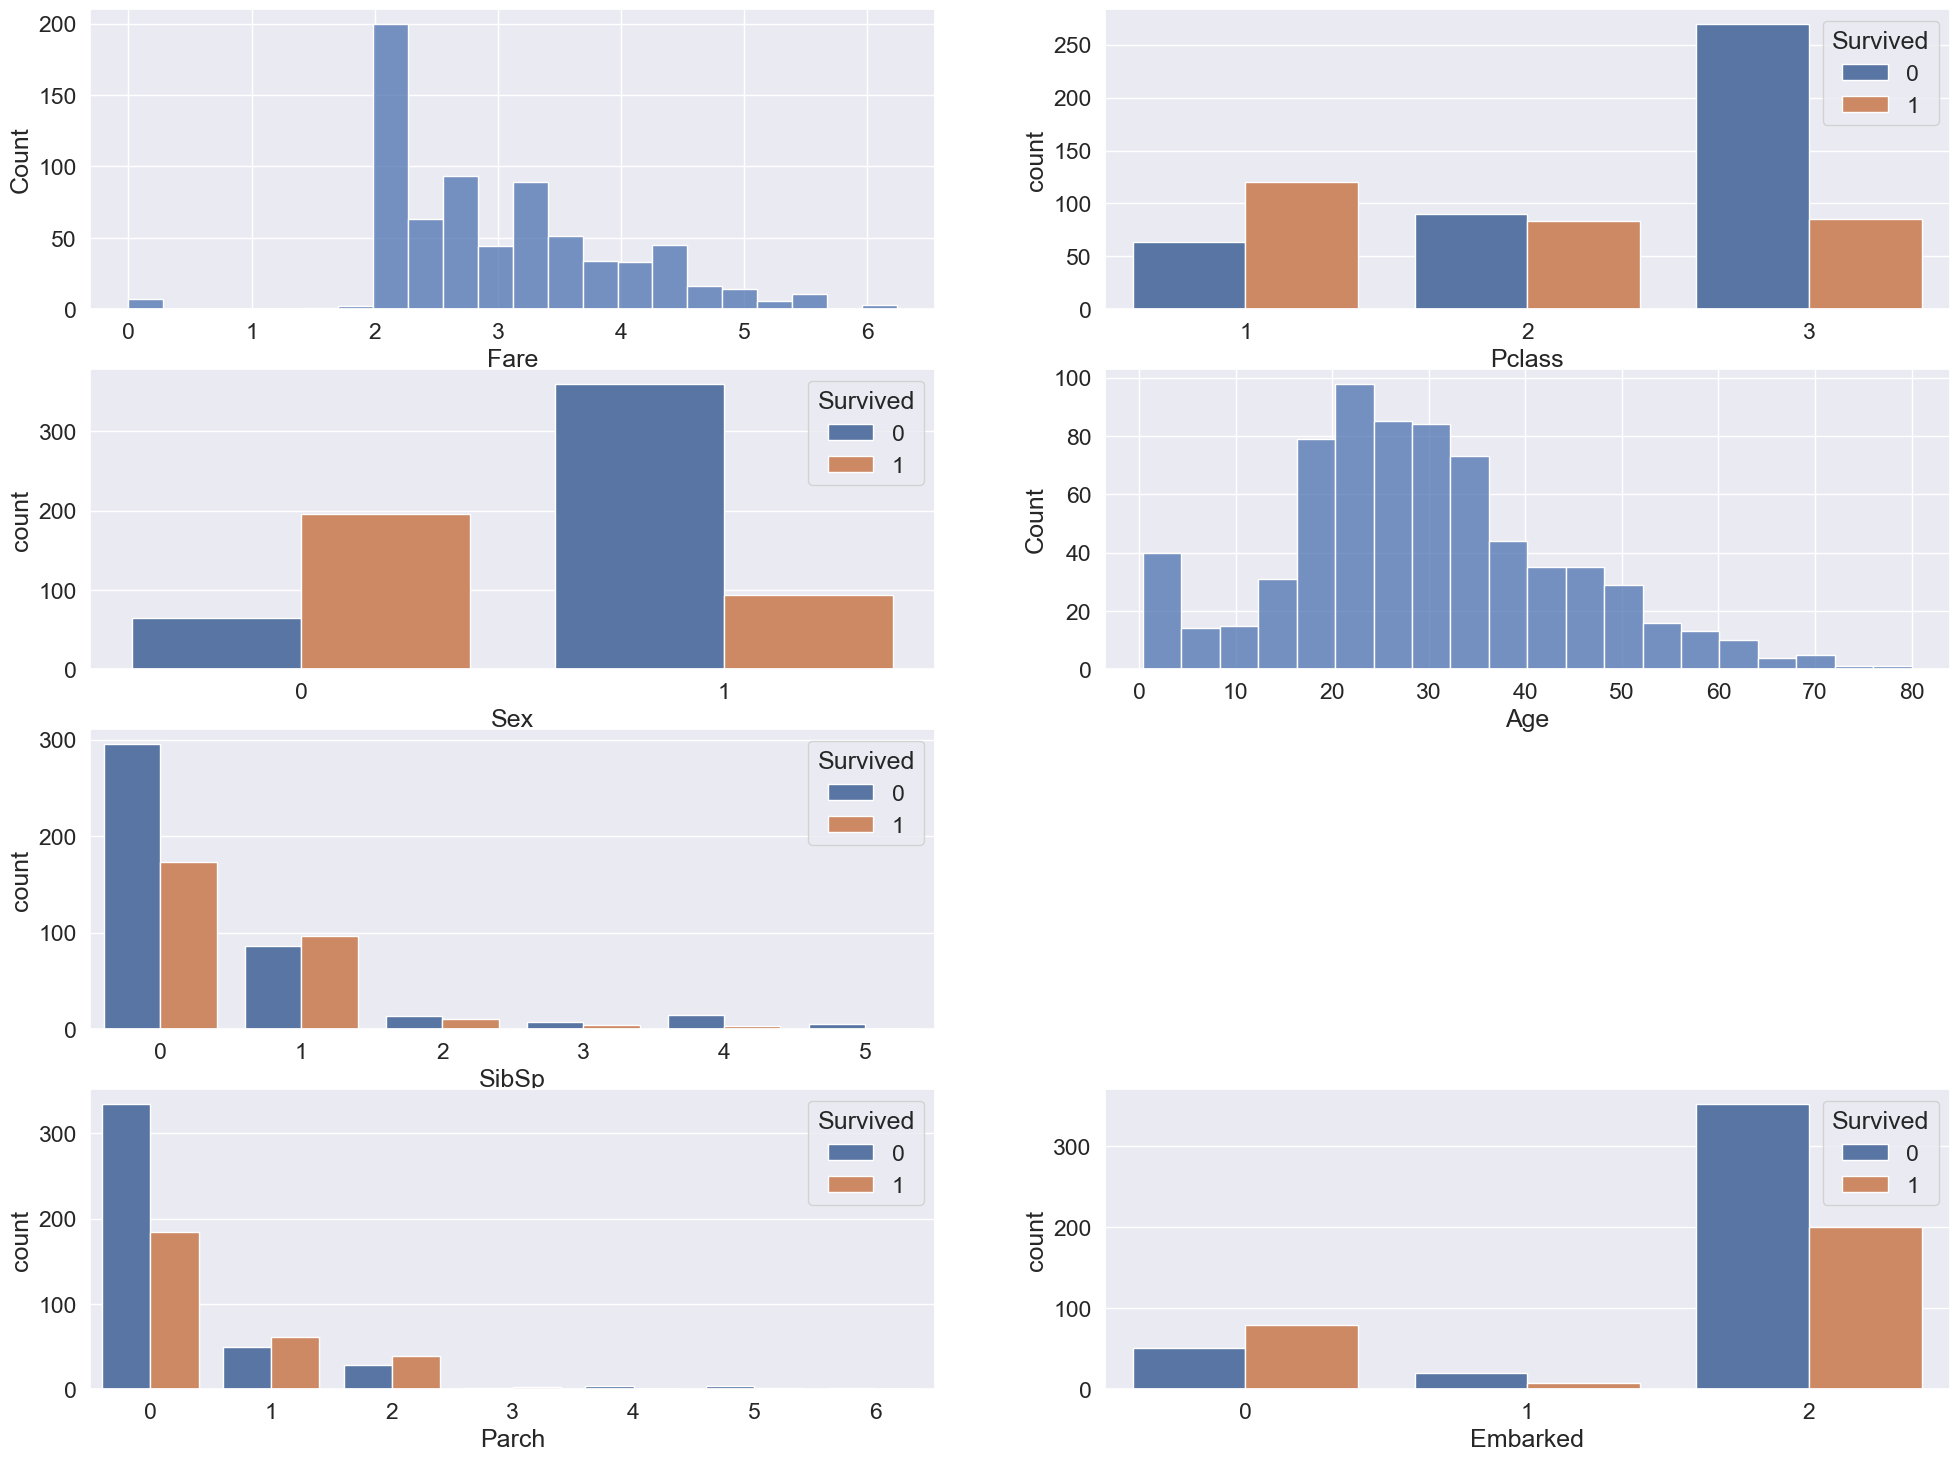

In [110]:
sns.set(font_scale=1.5)
fig=plt.figure(figsize=(24,60))

plt.subplot(13,2,1)
sns.histplot(x=ds_cleaned['Fare'])

plt.subplot(13,2,2)
sns.countplot(x='Pclass',data=ds_cleaned, hue='Survived')

plt.subplot(13,2,3)
sns.countplot(x='Sex',data=ds_cleaned, hue='Survived')

plt.subplot(13,2,4)
sns.histplot(x=ds_cleaned['Age'])

plt.subplot(13,2,5)
sns.countplot(data=ds_cleaned,x='SibSp', hue='Survived') 

plt.subplot(13,2,7)
sns.countplot(x='Parch',data=ds_cleaned, hue='Survived')

plt.subplot(13,2,8)
sns.countplot(x='Embarked',data=ds_cleaned, hue='Survived')

plt.show() 

In [111]:

def bivariate_cat(ds_cleaned,col1,col2,rot):
    cross_tab = pd.crosstab(ds_cleaned[col1], ds_cleaned[col2]).apply(lambda x:x/x.sum()*100,axis=1).round(2)
    print(cross_tab)
    sns.set(style="whitegrid") 
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=cross_tab.index, y=cross_tab[1], data=cross_tab)
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of customers exited'.format(col1))
    plt.title('{}vs exited rate'.format(col1))
    plt.xticks(rotation=rot)
    plt.show()
    return ax

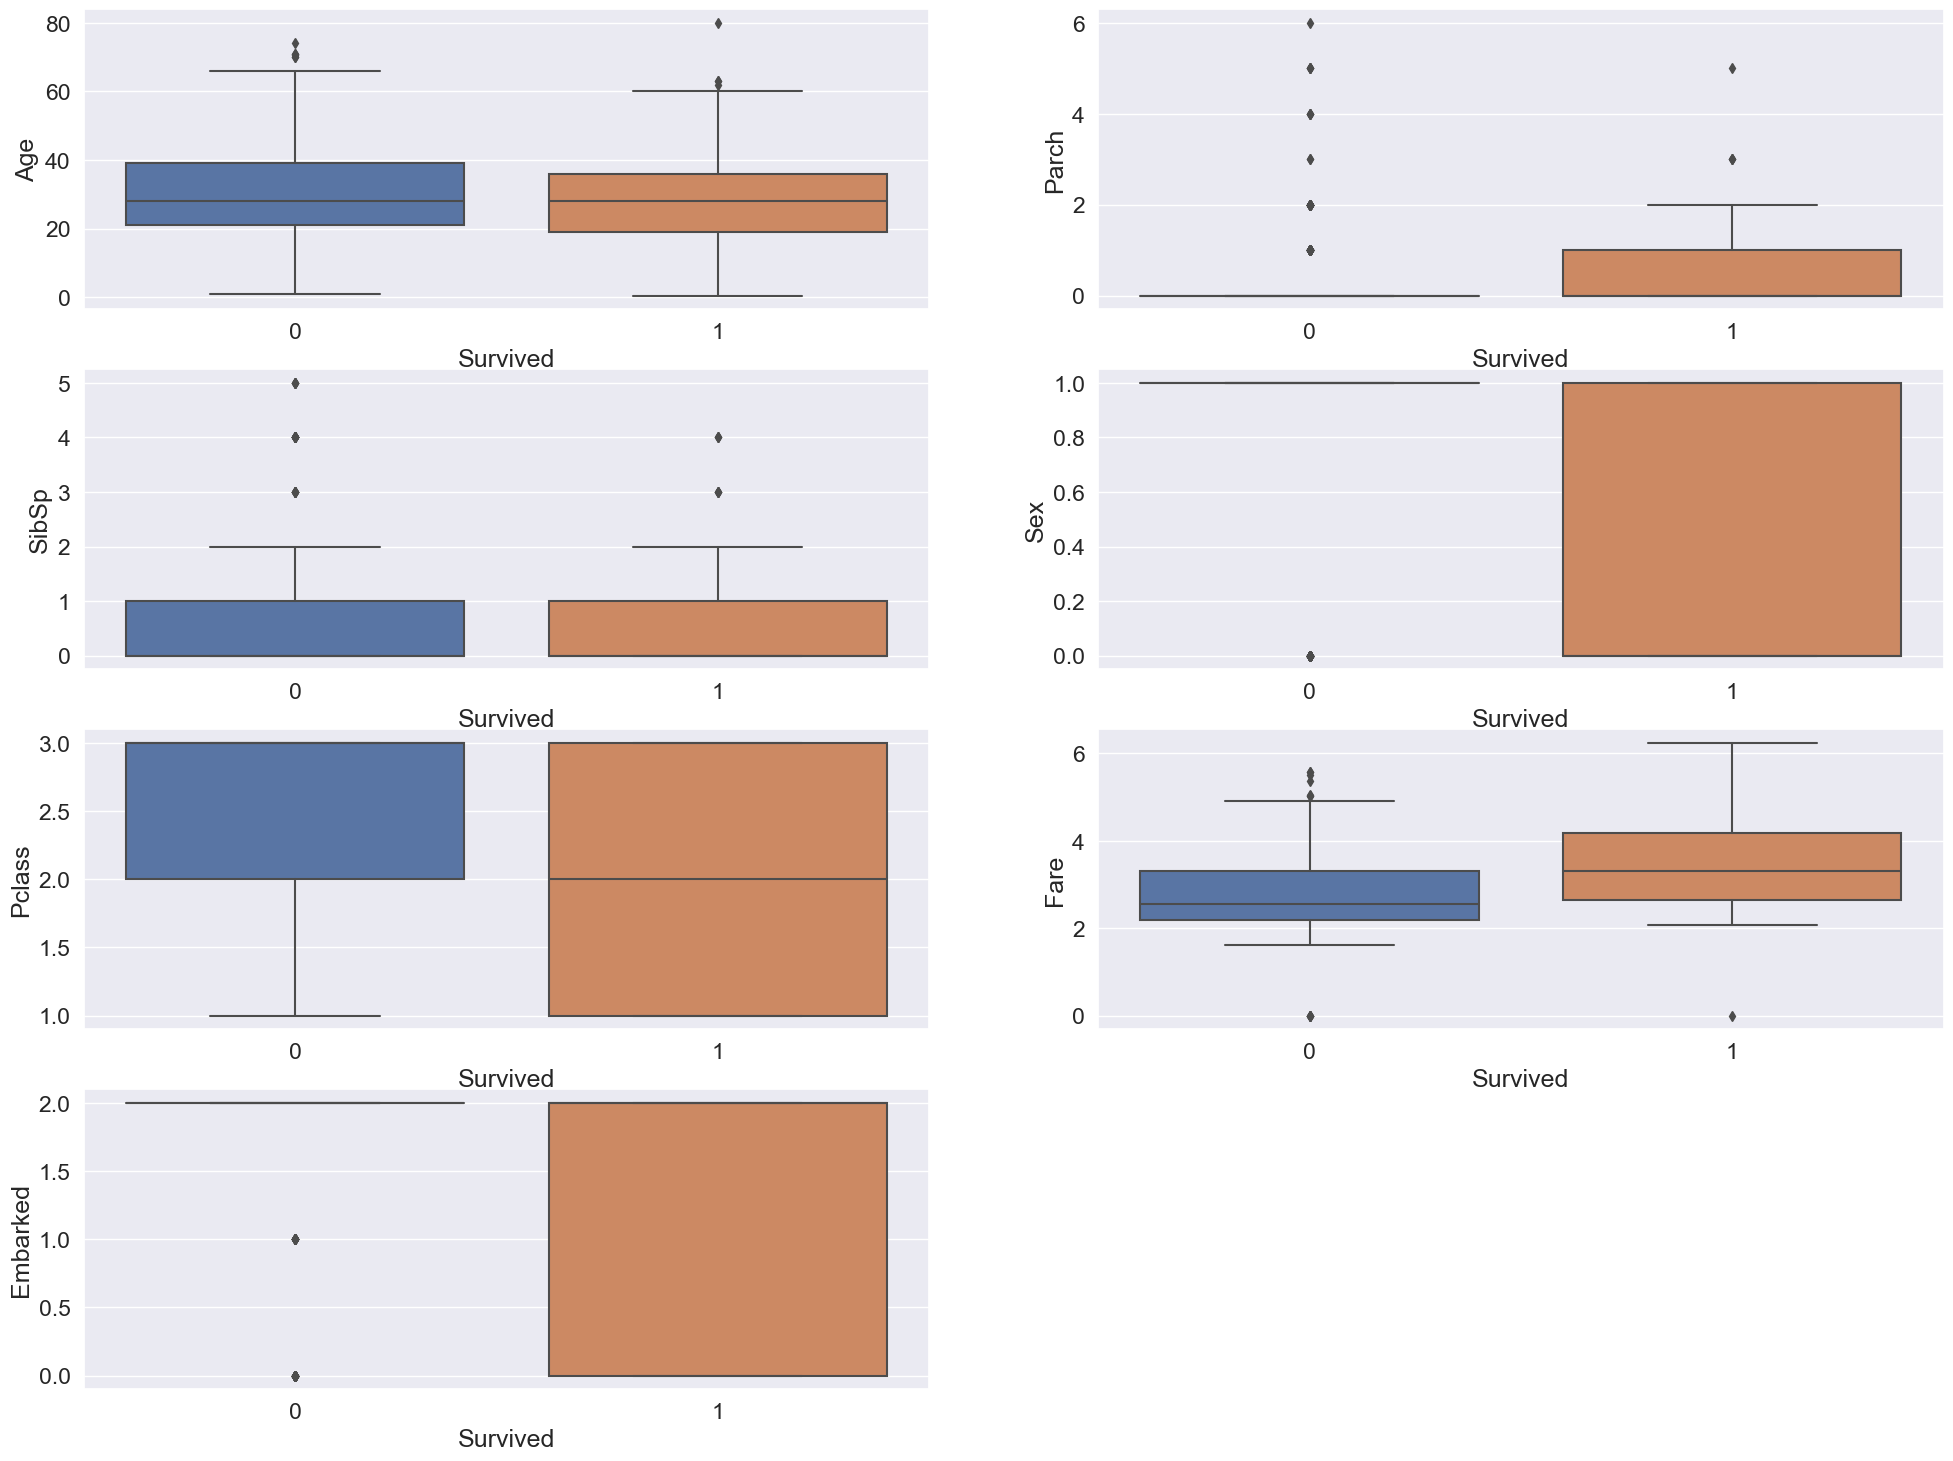

In [112]:
numerical_features=['Age','Parch','SibSp','Sex','Pclass','Fare','Embarked']
sns.set(font_scale=1.5)
fig=plt.figure(figsize=(24,60))
i=1
for column in ds_cleaned[numerical_features]:
    plt.subplot(13,2,i)
    sns.boxplot(x=ds_cleaned['Survived'],y=ds_cleaned.loc[:,column])
    i=i+1
    
plt.show()

In [113]:
ds['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

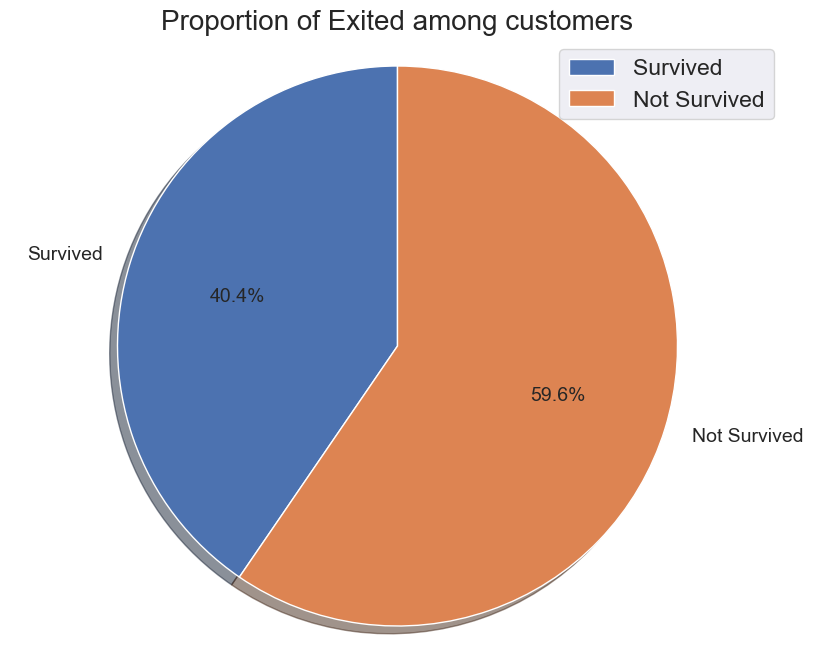

In [114]:
labels='Survived','Not Survived'
sizes=[ds_cleaned.Survived[ds_cleaned['Survived']==1].count(),ds_cleaned.Survived[ds_cleaned['Survived']==0].count()]
fig,ax=plt.subplots(figsize=(10,8))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,textprops={'fontsize':14})
ax.axis('equal')
plt.legend(loc='upper right')
plt.title("Proportion of Exited among customers",size=20)
plt.show()

In [115]:
X=ds_cleaned.drop('Survived',axis=1)
y=ds_cleaned['Survived']

In [116]:
rows_with_nan = X[X.isnull().any(axis=1)]
print(rows_with_nan.count())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
ds_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
ds_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [120]:
ds_test_final=ds_test.copy()
ds_test_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
drop_cols=['PassengerId','Name','Ticket','Cabin']
ds_test_final=ds_test_final.drop(drop_cols,axis=1)

In [122]:
ds_test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [123]:
rows_with_nan = ds_test_final[ds_test_final.isnull().any(axis=1)]
print(rows_with_nan.count())

Pclass      87
Sex         87
Age          1
SibSp       87
Parch       87
Fare        86
Embarked    87
dtype: int64


In [124]:
# Apply label encoding
ds_test_final['Embarked'] = label_encoder.fit_transform(ds_test_final['Embarked'])
ds_test_final['Sex'] = label_encoder.fit_transform(ds_test_final['Sex'])

ds_test_final['Fare'] = np.log(ds_test_final['Fare'] + 1)

In [127]:
rows_with_nan = ds_test_final[ds_test_final.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [126]:
# Fill NaN values in the 'age' column with the mean
mean_age = ds_test_final['Age'].mean()
ds_test_final['Age'].fillna(mean_age, inplace=True)

# Fill NaN values in the 'Fare' column with the mean
mean_age = ds_test_final['Fare'].mean()
ds_test_final['Fare'].fillna(mean_age, inplace=True)

ds_test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,2.178064,1
1,3,0,47.0,1,0,2.079442,2
2,2,1,62.0,0,0,2.369075,1
3,3,1,27.0,0,0,2.268252,2
4,3,0,22.0,1,1,2.586824,2


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [128]:
##Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [129]:
# Instantiate and fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [130]:
y_test_pred=dt_classifier.predict(ds_test_final)

In [133]:
df = pd.DataFrame(ds_test["PassengerId"])
df['Survived']=y_test_pred


In [142]:
df.to_csv('Gender.csv', index=False)

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Make predictions
y_pred_rf = rf_classifier.predict(ds_test_final)

In [149]:
df = pd.DataFrame(ds_test["PassengerId"])
df['Survived']=y_pred_rf
df.to_csv('Titanic_rf.csv', index=False)

In [147]:
from sklearn.linear_model import LogisticRegression

In [150]:
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X, y)

# Make predictions
y_pred_LRC = log_reg.predict(ds_test_final)

df = pd.DataFrame(ds_test["PassengerId"])
df['Survived']=y_pred_LRC
df.to_csv('Titanic_LRC.csv', index=False)

In [ ]:
###############################################################################################

In [138]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [57]:
y_pred = dt_classifier.predict(X)

In [58]:
# Evaluate the performance
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f'Accuracy before Scaling: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy before Scaling: 0.9859550561797753
Confusion Matrix:
[[424   0]
 [ 10 278]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       424
           1       1.00      0.97      0.98       288

    accuracy                           0.99       712
   macro avg       0.99      0.98      0.99       712
weighted avg       0.99      0.99      0.99       712



In [ ]:
sc=MinMaxScaler()
X_train_scaled=sc.fit_transform(X)
X_test_scaled=sc.transform(ds_test_final)